In [174]:
import pandas as pd
import seaborn as sns
import numpy as np

In [175]:
import matplotlib.pyplot as plt
df=pd.read_csv("C:\\Users\\AMULYA GAJE\\Downloads\\CarPrice_Assignment.csv")

In [176]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [177]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [178]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

<Axes: xlabel='enginesize', ylabel='price'>

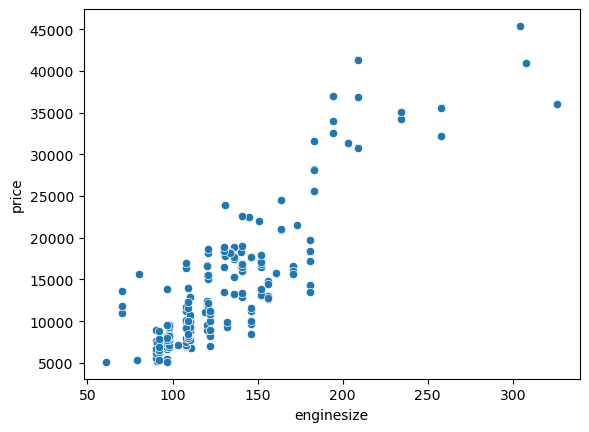

In [179]:
sns.scatterplot(x=df.enginesize,y=df.price)

In [180]:
X=df[['enginesize']]
y=df[['price']]

In [181]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [182]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

slr = LinearRegression()
slr.fit(X_train, y_train)

y_pred_slr = slr.predict(X_test)
r2_slr = r2_score(y_test, y_pred_slr)

r2_slr


0.8040958796678975

In [183]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=4)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

y_pred_poly = poly_model.predict(X_test_poly)
r2_poly = r2_score(y_test, y_pred_poly)

r2_poly


0.8524297352148219

In [184]:
print("R² Score (SLR):", r2_slr)
print("R² Score -Polynomial:", r2_poly)


R² Score (SLR): 0.8040958796678975
R² Score -Polynomial: 0.8524297352148219


c:\Users\AMULYA GAJE\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\AMULYA GAJE\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


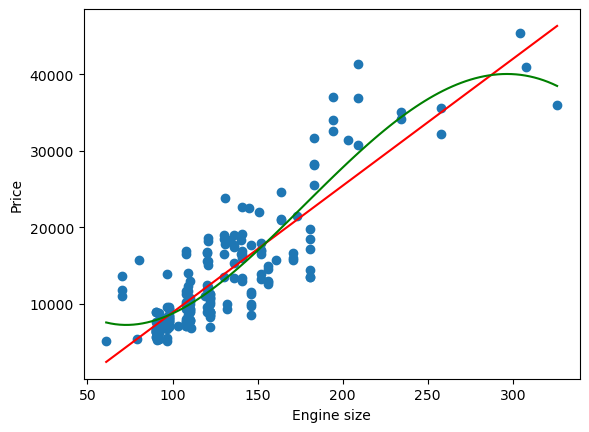

In [185]:
X_line=np.linspace(X.min(),X.max(),100).reshape(-1,1)
y_slr=slr.predict(X_line)
y_poly=poly_model.predict(poly.transform(X_line))
plt.scatter(X,y)
plt.xlabel('Engine size')
plt.ylabel('Price')
plt.plot(X_line,y_slr,color='red')
plt.plot(X_line,y_poly,color='green')
plt.show()



In [186]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [187]:
mse_slr=mean_squared_error(y_test,y_pred_slr)
print("slr mean squared error",mse_slr)
mse_mlr=mean_absolute_error(y_test,y_pred_poly)
print("poly mean squared error",mse_mlr)

slr mean squared error 15465458.965908466
poly mean squared error 2356.697296471875


In [188]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [189]:
X=np.array([[1],[2],[3],[4],[5],[6],[7],[8],[9],[10]])
y=np.array([0,0,0,0,1,1,1,1,1,1])
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [190]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [191]:
y_pred=model.predict(X_test)
print("Prediction",y_pred)
accuracy=accuracy_score(y_test,y_pred)
print(f"Accuracy:{accuracy:.2f}")


Prediction [1 0]
Accuracy:1.00


In [192]:
print("Classification Report",classification_report(y_test,y_pred))

Classification Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



Text(0, 0.5, ' Probability of Pass')

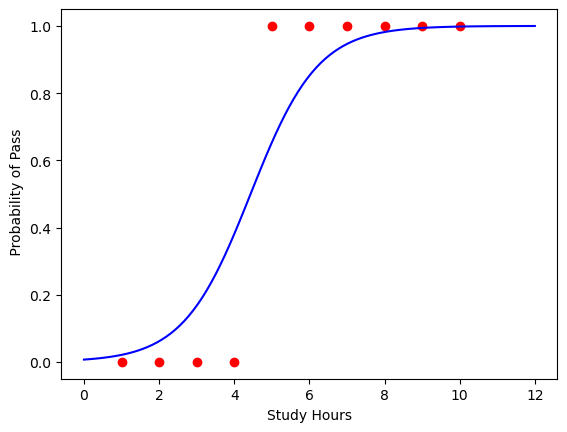

In [193]:
X_range=np.linspace(0,12,100).reshape(-1,1)
y_prob=model.predict_proba(X_range)[:,1]
plt.scatter(X,y,color="red",label="Actual Data")
plt.plot(X_range,y_prob,color="blue",label="Logistic Regression Curve")
plt.xlabel("Study Hours")
plt.ylabel(" Probability of Pass")


In [194]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print("Confusion Matrix\n",cm)

Confusion Matrix
 [[1 0]
 [0 1]]


TN-CORRECTLY PREDICTED NO
FP-PREDICTED YES,BUT ACTUALLY NO
FN-PREDICTED NO,BU ACTUALLY YES
TP=COREECTLY PREDICTED YES
[[TN FP][FN TP]]

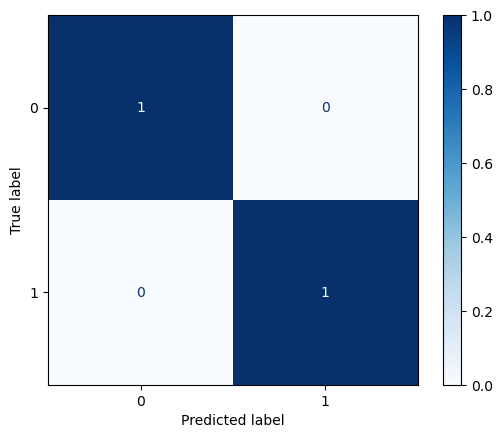

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
ConfusionMatrixDisplay.from_predictions(
    y_test,y_pred,cmap="Blues",values_format="d"
)


In [196]:
df=pd.read_csv("C:\\Users\\AMULYA GAJE\\Downloads\\heart.csv")

In [197]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [198]:
x=df.drop("target",axis=1)
y=df['target']

In [199]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)


In [200]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [201]:
print(X_train.shape)
print(y_train.shape)

(820, 13)
(820,)


In [202]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [203]:
y_pred=model.predict(X_test)
print("Prediction",y_pred)
accuracy=accuracy_score(y_test,y_pred)
print(f"Accuracy:{accuracy:.2f}")

Prediction [1 1 0 1 0 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1
 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1
 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 1 1 0 1 0 1 0 1 1
 1 1 0 1 1 1 1 1 0 0 1 0 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1
 1 0 1 0 1 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 0]
Accuracy:0.80


In [205]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print("Confusion matrix\n",cm)

Confusion matrix
 [[73 29]
 [13 90]]


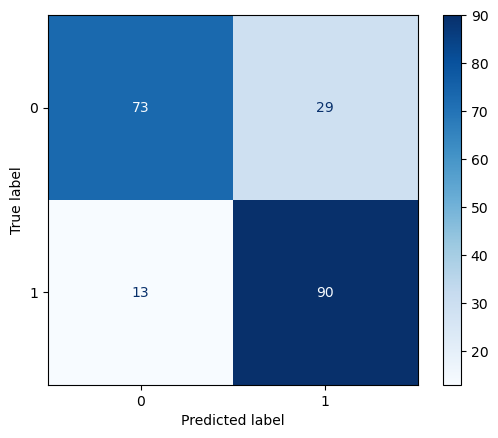

In [206]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
ConfusionMatrixDisplay.from_predictions(
    y_test,y_pred,cmap="Blues",values_format="d"
)
